In [1]:
# This is the import cell
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
data = os.listdir('bulkData')
try:
    data.remove('.DS_Store')
except:
    pass
print(data)

['active_in_bulk_pe500.0_lattice0.93.txt', 'active_in_bulk_pe200.0_lattice0.96.txt', 'active_in_bulk_pe230.0_lattice0.9.txt', 'active_in_bulk_pe430.0_lattice0.96.txt', 'active_in_bulk_pe330.0_lattice0.93.txt', 'active_in_bulk_pe310.0_lattice0.99.txt', 'active_in_bulk_pe100.0_lattice0.94.txt', 'active_in_bulk_pe290.0_lattice1.0.txt', 'active_in_bulk_pe300.0_lattice0.97.txt', 'active_in_bulk_pe400.0_lattice0.92.txt', 'active_in_bulk_pe230.0_lattice0.92.txt', 'active_in_bulk_pe210.0_lattice0.98.txt', 'active_in_bulk_pe420.0_lattice0.98.txt', 'active_in_bulk_pe450.0_lattice0.9.txt', 'active_in_bulk_pe130.0_lattice0.91.txt', 'active_in_bulk_pe420.0_lattice0.99.txt', 'active_in_bulk_pe210.0_lattice0.99.txt', 'active_in_bulk_pe170.0_lattice0.9.txt', 'active_in_bulk_pe230.0_lattice0.93.txt', 'active_in_bulk_pe400.0_lattice0.93.txt', 'active_in_bulk_pe300.0_lattice0.96.txt', 'active_in_bulk_pe100.0_lattice0.95.txt', 'active_in_bulk_pe350.0_lattice1.0.txt', 'active_in_bulk_pe310.0_lattice0.98.tx

In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
print(data[0])
print(checkFile(data[0], "active"))

active_in_bulk_pe500.0_lattice0.93.txt
True


In [5]:
# Grab parameters, sort them
peList = []
latList = []

for i in xrange(len(data)):
    if checkFile(data[i], "pe"):
        peList.append(txtValue(data[i], "pe"))
    else:
        peList.append(0)
    
    if checkFile(data[i], "lattice"):
        latList.append(txtValue(data[i], "lattice"))
    else:
        latList.append(0)

# # Take a look at your lists
# print(peList)
# print(latList)        

# Sort the arrays
if len(peList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(peList, peList, latList)
    indSort(data, indArr)
    indSort(peList, indArr)
    indSort(latList, indArr)

# Print the sorted array
print("Sorted textfiles:")
for i in data:
    print(i)
    
# Now that the data is sorted, read it into a dataframe
all_data = []
os.chdir('bulkData')
for i in xrange(len(data)):
    df = pd.read_csv(data[i], sep='\s+', header=0)
    all_data.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_data[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
Sorted textfiles:
active_in_bulk_pe50.0_lattice0.9.txt
active_in_bulk_pe50.0_lattice0.91.txt
active_in_bulk_pe50.0_lattice0.92.txt
active_in_bulk_pe50.0_lattice0.93.txt
active_in_bulk_pe50.0_lattice0.94.txt
active_in_bulk_pe50.0_lattice0.95.txt
active_in_bulk_pe50.0_lattice0.96.txt
active_in_bulk_pe50.0_lattice0.97.txt
active_in_bulk_pe50.0_lattice0.98.txt
active_in_bulk_pe50.0_lattice0.99.txt
active_in_bulk_pe50.0_lattice1.0.txt
active_in_bulk_pe60.0_lattice0.9.txt
active_in_bulk_pe60.0_lattice0.91.txt
active_in_bulk_pe60.0_lattice0.92.txt
active_in_bulk_pe60.0_lattice0.93.txt
active_in_bulk_pe60.0_lattice0.94.txt
active_in_bulk_pe60.0_lattice0.95.txt
active_in_bulk_pe60.0_lattice0.96.txt
active_in_bulk_pe60.0_lattice0.97.txt
active_in_bulk_pe60.0_lattice0.98.txt
active_in_bulk_pe60.0_lattice0.99.txt
active_in_bulk_pe60.0_lattice1.0.txt
active_in_bulk_pe70.0_lattice0.9.txt
active_in_bulk_pe70.0_lattice0.91.txt
active_in_bulk_pe70.0_lattice0.92.txt
active_in_bulk_pe70.0_lat

,Activity,Lattice,Instant_v,half_taur_v,taur_v,taub_v
0,50.0,0.9,1876.8518,0.2864,0.1603,0.0576


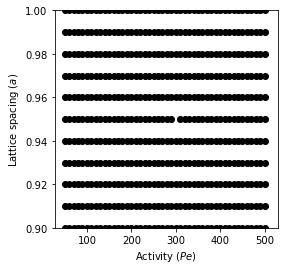

In [6]:
# Plot as filled or unfilled points
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for i in xrange(len(all_data)):
    if all_data[i]['taub_v'][0] > 0:
        ax.scatter(peList[i], latList[i], facecolors='k', edgecolors='k')
    else:
        ax.scatter(peList[i], latList[i], facecolors='w', edgecolors='k')

ax.set_ylim(0.9, 1.)
ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'Lattice spacing $(a)$')
plt.show()

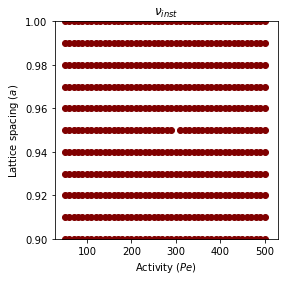

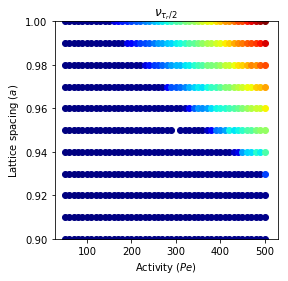

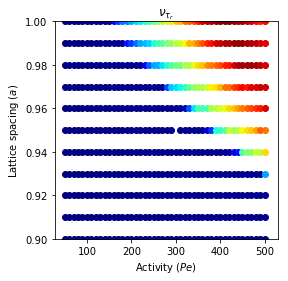

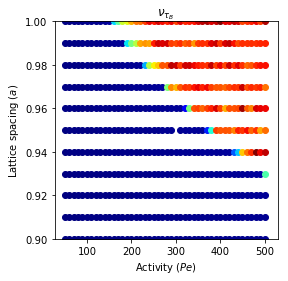

In [7]:
# Get velocity on different timeframes
instV = []
half_taurV = []
taurV = []
taubV = []
# Grab data from files
for i in xrange(len(all_data)):
    instV.append(all_data[i]['Instant_v'][0])
    half_taurV.append(all_data[i]['half_taur_v'][0])
    taurV.append(all_data[i]['taur_v'][0])
    taubV.append(all_data[i]['taub_v'][0])

# Put in a list of lists
allVs = [instV, half_taurV, taurV, taubV]
maxVs = [max(instV), max(half_taurV), max(taurV), max(taubV)]
titles = [r'$\nu_{inst}$', r'$\nu_{\tau_{r}/2}$', r'$\nu_{\tau_{r}}$', r'$\nu_{\tau_{B}}$']

# Now let's plot the velocity as a heatmap?
for i in xrange(len(allVs)):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for j in xrange(len(all_data)):
        ax.scatter(peList[j], latList[j], c=plt.cm.jet((allVs[i][j])/maxVs[i]))
    ax.set_ylim(0.9, 1.)
    ax.set_xlabel(r'Activity $(Pe)$')
    ax.set_ylabel(r'Lattice spacing $(a)$')
    ax.set_title(titles[i])
    plt.show()

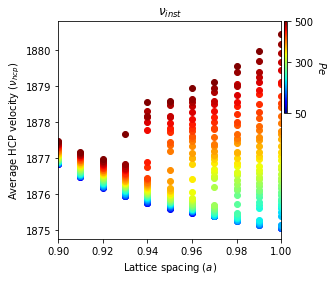

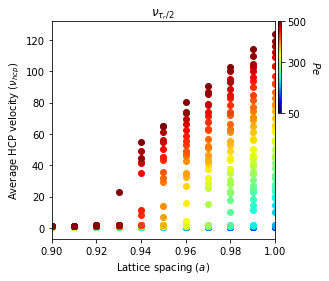

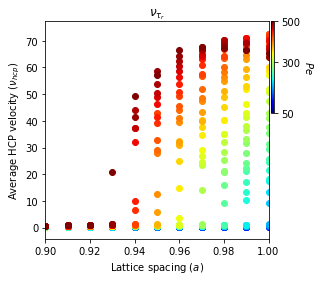

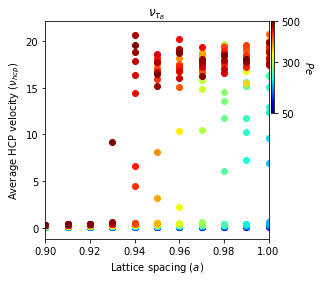

In [8]:
# Let's plot lines on velocity vs lattice and velocity vs activity
maxPe = max(peList)
for i in xrange(len(allVs)):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for j in xrange(len(all_data)):
        ax.scatter(latList[j], allVs[i][j], c=plt.cm.jet(peList[j]/maxPe))

    ax.set_xlim(0.9, 1.)
    ax.set_xlabel(r'Lattice spacing $(a)$')
    ax.set_ylabel(r'Average HCP velocity $(\nu_{hcp})$')
    ax.set_title(titles[i])

    # Make a colorbar (left, bottom, width, height)
    ax3 = fig.add_axes([0.91, 0.562, 0.01, 0.32])
    jet_trunc = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=50, vmax=500)
    cb1 = mpl.colorbar.ColorbarBase(ax3, cmap=jet_trunc,
                                    norm=norm,
                                    orientation='vertical',
                                    ticks=[50, 300, 500])
    cb1.set_label(r'$Pe$', labelpad=15, rotation=270)
    plt.show()

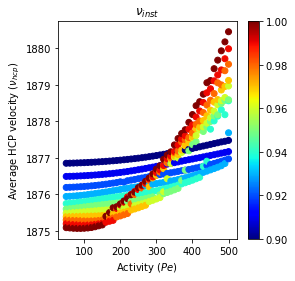

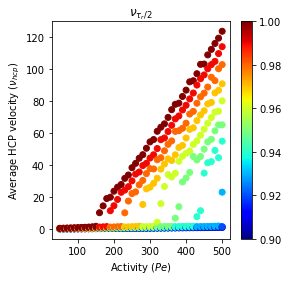

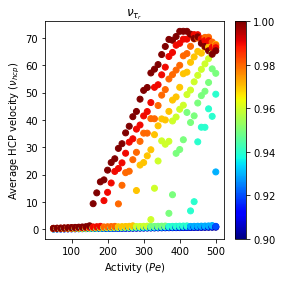

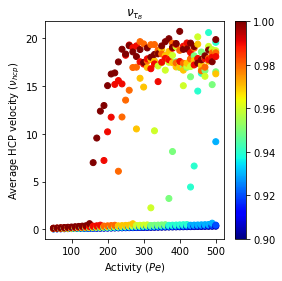

In [9]:
# Let's plot lines on velocity vs lattice and velocity vs activity
maxLat = max(latList)

def rhoNu(v0, phi):
    return v0 * (1. - (1.05*phi))

def cirArea(sigma):
    return ( np.pi * ((sigma/2.)**2) )

# def hexArea(lat):
#     return ( (3. * np.sqrt(3.)) / 2. ) * (lat**2)

def hexArea(lat):
    '''A regular hexagon is six equilateral triangles'''
    side = (3. * lat / 2.)
    return 6. * (np.sqrt(3.) / 4.) * (side**2)

uniqueLat = []
for i in xrange(len(all_data)):
    if latList[i] not in uniqueLat:
        uniqueLat.append(latList[i])

for i in xrange(len(allVs)):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    theory = [ [] for x in xrange(len(uniqueLat))]
    xs = np.arange(0., 500., 0.001)
    for j in xrange(len(uniqueLat)):
        phi = 7. * (cirArea(1.) / hexArea(uniqueLat[j]))
#         print"Lattice spacing: {}, gives area fraction: {}".format(uniqueLat[j], phi)
        theory[j].append(rhoNu(xs, phi))
        color = (uniqueLat[j] - min(uniqueLat)) / (max(uniqueLat) - min(uniqueLat))
#         ax.plot(xs, rhoNu(xs, phi), c=plt.cm.jet(color))

    sc1 = ax.scatter(peList, allVs[i], c=latList, cmap='jet', vmin=0.9, vmax=1.)
    plt.colorbar(sc1)
    ax.set_xlabel(r'Activity $(Pe)$')
    ax.set_ylabel(r'Average HCP velocity $(\nu_{hcp})$')
    ax.set_title(titles[i])
    plt.show()

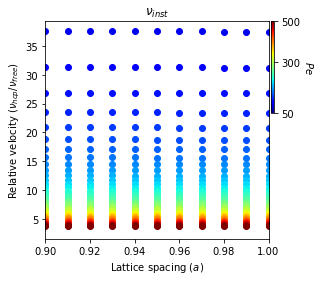

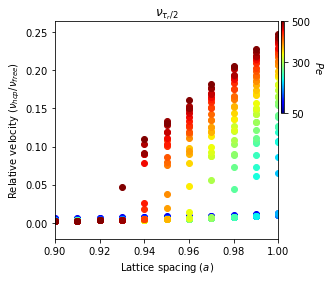

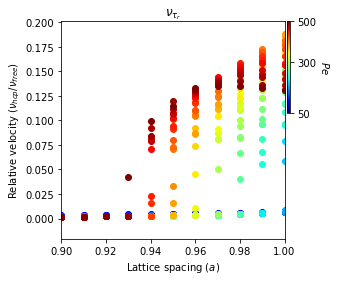

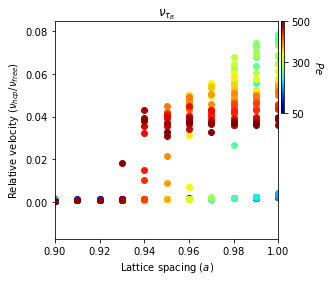

In [10]:
# Plot these same things relative to the free velocity
maxPe = max(peList)
for i in xrange(len(allVs)):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for j in xrange(len(all_data)):
        ax.scatter(latList[j], allVs[i][j] / peList[j], c=plt.cm.jet(peList[j]/maxPe))

    ax.set_xlim(0.9, 1.)
    ax.set_xlabel(r'Lattice spacing $(a)$')
    ax.set_ylabel(r'Relative velocity $(\nu_{hcp}/\nu_{free})$')
    ax.set_title(titles[i])

    # Make a colorbar (left, bottom, width, height)
    ax3 = fig.add_axes([0.91, 0.562, 0.01, 0.32])
    jet_trunc = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=50, vmax=500)
    cb1 = mpl.colorbar.ColorbarBase(ax3, cmap=jet_trunc,
                                    norm=norm,
                                    orientation='vertical',
                                   ticks=[50, 300, 500])
    cb1.set_label(r'$Pe$', labelpad=15, rotation=270)

    plt.show()

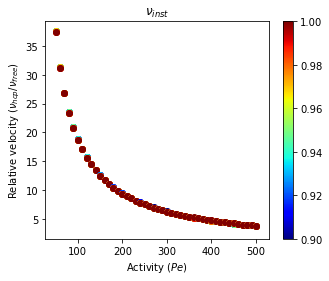

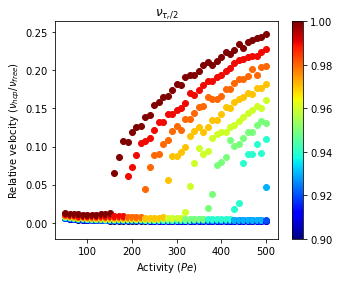

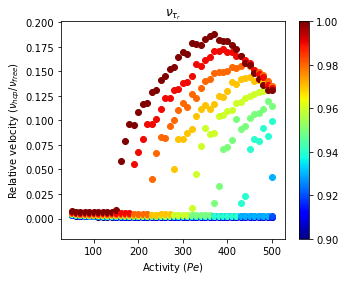

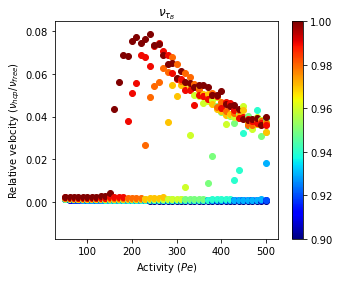

In [11]:
# Let's plot lines on velocity vs lattice and velocity vs activity
for i in xrange(len(allVs)):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    for j in xrange(len(allVs[i])):
        sc1 = ax.scatter(peList[j], allVs[i][j]/peList[j], c=latList[j], cmap='jet', vmin=0.9, vmax=1.)
    plt.colorbar(sc1)
    ax.set_xlabel(r'Activity $(Pe)$')
    ax.set_ylabel(r'Relative velocity $(\nu_{hcp}/\nu_{free})$')
    ax.set_title(titles[i])
    plt.show()

0.3326265714285715
0.33735472027972035
0.31774125000000003
0.3182194692264258
0.32417970256410256
0.3307755073891626
0.3331322782258065


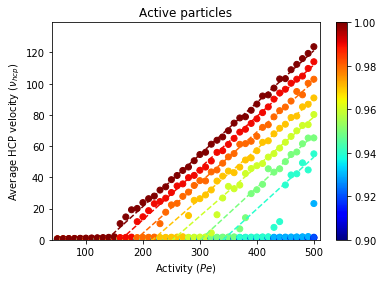

In [31]:
# CODE UPDATE STOPS HERE

IND = 1

# What is the actual relationship between density and velocity?
from scipy import stats

fig, ax = plt.subplots()
maxLat = max(latList)

def line(x, m, b):
    return (m*x) + b

def cirArea(sigma):
    return ( np.pi * ((sigma/2.)**2) )

def hexArea(lat):
    '''A regular hexagon is six equilateral triangles'''
    side = (3. * lat / 2.)
    return 6. * (np.sqrt(3.) / 4.) * (side**2)

def latToPhi(lat, sigma=1.):
    return 7. * cirArea(sigma) / hexArea(lat)

# Lists to contain slopes, intercepts, lattice spacings
ms = []
bs = []
latFit = []
cols = []

# Get unique lattice values
uniqueLat = []
for i in xrange(len(all_data)):
    if latList[i] not in uniqueLat:
        uniqueLat.append(latList[i])

for i in xrange(len(uniqueLat)):
    xdat = []
    ydat = []
    for j in xrange(len(all_data)):
        # Active particle with matching lattice spacing
        if latList[j] == uniqueLat[i]:
            if allVs[IND][j] > 20.:
                xdat.append(peList[j])
                ydat.append(allVs[IND][j])
    if len(xdat) >= 2:
        slope, intercept, r_value, p_value, std_err = stats.linregress(xdat, ydat)
        ms.append(slope)
        bs.append(intercept)
        latFit.append(uniqueLat[i])
        cols.append((uniqueLat[i] - min(uniqueLat)) / (max(uniqueLat) - min(uniqueLat)))

xs = np.arange(0., 500., 0.0001)
for i in xrange(len(ms)):
    plt.plot(xs, line(xs, ms[i], bs[i]), c=plt.cm.jet(cols[i]), ls='--')
    print(ms[i])

sc1 = ax.scatter(peList, allVs[IND], c=latList, cmap='jet', vmin=0.9, vmax=1.)
plt.colorbar(sc1)
ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'Average HCP velocity $(\nu_{hcp})$')
ax.set_title('Active particles')
ax.set_xlim(40,510)
ax.set_ylim(0.,)
plt.show()

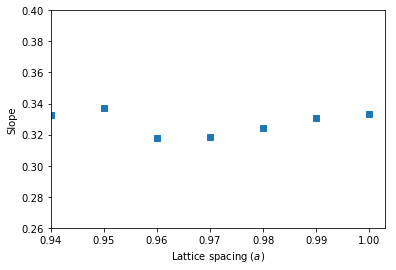

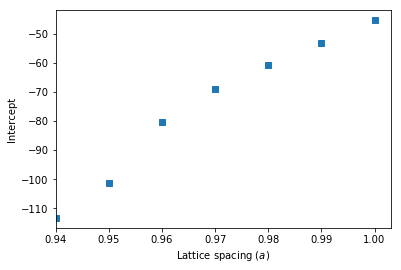

In [32]:
# Plot the slopes and intercepts as a funcion of lattice spacing
plt.plot(latFit, ms, marker='s', ls='')
plt.xlim(left=0.94)
plt.xlabel(r'Lattice spacing $(a)$')
plt.ylabel(r'Slope')
plt.ylim(0.26, 0.4)
plt.show()

plt.plot(latFit, bs, marker='s', ls='')
plt.xlim(left=0.94)
plt.xlabel(r'Lattice spacing $(a)$')
plt.ylabel(r'Intercept')
plt.show()

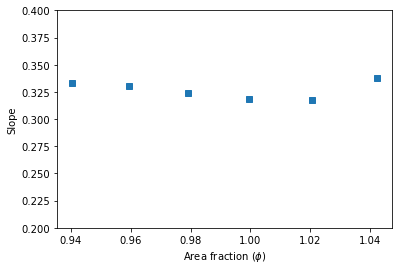

Slope: -521.875679142, intercept: 448.466104858


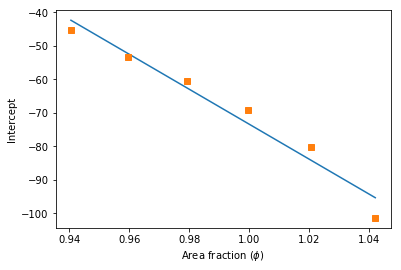

In [33]:
# Get the intercept as a function of the area fraction

# Get indices that I want (reduced)
keepInds = [ i for i in xrange(len(latFit)) if 0.94 < latFit[i] < 1.05 ]
redLat = [ latFit[i] for i in keepInds ]
redms = [ ms[i] for i in keepInds ]
redbs = [ bs[i] for i in keepInds ]

phiFit = []
for i in redLat:
    phiFit.append(latToPhi(i, 1.))

plt.plot(phiFit, redms, marker='s', ls='')
plt.xlabel(r'Area fraction $(\phi)$')
plt.ylabel(r'Slope')
plt.ylim(0.2, 0.4)
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(phiFit, redbs)
xplot = np.arange(min(phiFit), max(phiFit), 0.0001)
plt.plot(xplot, line(xplot, slope, intercept))
print("Slope: {}, intercept: {}").format(slope, intercept)

plt.plot(phiFit, redbs, marker='s', ls='')
plt.xlabel(r'Area fraction $(\phi)$')
plt.ylabel(r'Intercept')
plt.show()

['$\\phi_{cp}$', 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002]


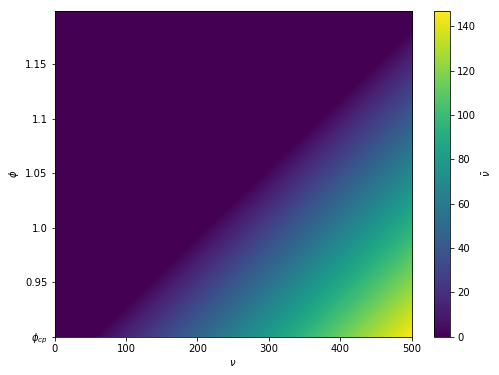

In [48]:
# Combine it all
def nuDense(v0, phi):
    return (0.33 * v0) + (-520.*phi + 450.)

vs = np.arange(0., 500., 0.01)
phis = np.arange(0.9, 1.2, 0.001)

matrix = np.zeros((len(vs), len(phis)), dtype=np.float64)
for i in xrange(len(vs)):
    for j in xrange(len(phis)):
        f = nuDense(vs[i], phis[j])
        if f >= 0.:
            matrix[i][j] = nuDense(vs[i], phis[j])

# Now plot the matrix
fig = plt.figure(figsize=(8, 6))
s = fig.add_subplot(1, 1, 1, xlabel='$\\nu$', ylabel='$\\phi$')
im = s.imshow(matrix.T, extent=(vs[0], vs[-1], phis[0], phis[-1]), origin='lower', aspect='auto')
cbar = fig.colorbar(im)
cbar.set_label(r'$\bar{\nu}$')

# Change a tick label to show close-packing
labels = [item.get_text() for item in s.get_yticklabels()]
count = 0.9
for i in xrange(len(labels)):
    labels[i] = count
    count += 0.05
labels[0] = r'$\phi_{cp}$'
print(labels)
s.set_yticklabels(labels)

plt.show()